<a href="https://colab.research.google.com/github/FrancoAcerbi1/MachineLearningPython/blob/main/Final_Project_Machine_Learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# load dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("FinalProjectDataSet-BIG5LEAGUES2.csv")
df.head(20)

Saving FinalProjectDataSet-BIG5LEAGUES2.csv to FinalProjectDataSet-BIG5LEAGUES2.csv


,TeamId,Squad,Competition,Country,GamesPlayed,Rank,GoalDiff,Attendance,PlUsed,PlAge,...,PrgCariers,PrgPasses,GlsAsistPer90,Sh,SoTPercentage,GlsperSoT,DistofShot,PassesCmp,PassCmpPer,PrgDist
0,1,Ajaccio,fr Ligue 1,fr FRA,38,18,-51,"7,369",36,29.1,...,487,1169,0.89,311,26.0,0.20,18.1,11216,73.4,81586
1,2,Almería,es La Liga,es ESP,38,17,-16,"12,961",29,26.4,...,569,1090,2.16,439,35.3,0.30,18.1,12151,76.6,89276
2,3,Angers,fr Ligue 1,fr FRA,38,20,-48,"9,63",33,25.7,...,632,1393,1.29,367,33.0,0.22,17.5,14103,80.8,88748
3,4,Arsenal,eng Premier League,eng ENG,38,2,45,"60,191",26,24.7,...,824,2049,3.89,589,32.9,0.42,16.0,18281,83.2,100635
4,5,Aston Villa,eng Premier League,eng ENG,38,7,5,"39,485",26,27.0,...,637,1242,2.21,427,34.0,0.32,18.0,13782,79.2,87581
5,6,Atalanta,it Serie A,it ITA,38,5,18,"18,241",27,26.5,...,687,1637,2.79,506,33.2,0.35,16.9,15462,79.3,97492
6,7,Athletic Club,es La Liga,es ESP,38,8,4,"43,488",26,27.4,...,864,1816,2.08,541,29.0,0.26,17.1,14440,77.5,96037
7,8,Atlético Madrid,es La Liga,es ESP,38,3,37,"55,8",27,28.5,...,730,1571,3.13,538,36.2,0.34,17.0,16814,82.1,101839
8,9,Augsburg,de Bundesliga,de GER,34,15,-21,"27,956",34,25.9,...,331,847,2.06,354,28.5,0.37,18.2,8422,66.1,75215
9,10,Auxerre,fr Ligue 1,fr FRA,38,17,-28,"15,606",33,27.3,...,531,1284,1.29,420,27.9,0.21,19.6,12386,77.5,90967


In [3]:
# dataframe information and first 5 rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TeamId         98 non-null     int64  
 1   Squad          98 non-null     object 
 2   Competition    98 non-null     object 
 3   Country        98 non-null     object 
 4   GamesPlayed    98 non-null     int64  
 5   Rank           98 non-null     int64  
 6   GoalDiff       98 non-null     int64  
 7   Attendance     98 non-null     object 
 8   PlUsed         98 non-null     int64  
 9   PlAge          98 non-null     float64
 10  Possession     98 non-null     float64
 11  TotalGlsAsist  98 non-null     int64  
 12  PrgCariers     98 non-null     int64  
 13  PrgPasses      98 non-null     int64  
 14  GlsAsistPer90  98 non-null     float64
 15  Sh             98 non-null     int64  
 16  SoTPercentage  98 non-null     float64
 17  GlsperSoT      98 non-null     float64
 18  DistofShot  

In [4]:
df['Attendance'] = df['Attendance'].replace(',', '', regex=True).astype('int64')


In [5]:
# Normalize selected columns by dividing them by the 'GamesPlayed' column
df[['TotalGlsAsist', 'PrgCariers', 'PrgPasses', 'Sh', 'PassesCmp', 'PrgDist']] = df[['TotalGlsAsist', 'PrgCariers', 'PrgPasses', 'Sh', 'PassesCmp', 'PrgDist']].div(df['GamesPlayed'], axis=0)


In [6]:
# Define a function to map ranks to classifications
def classify_rank(rank):
    if rank <= 5:
        return 0  # Top 5
    elif rank <= 15:
        return 1  # Mid-table (adjust the range as needed)
    else:
        return 2  # Relegating

# Apply the function to create the LogisticClasification column
df['LogisticClasification'] = df['Rank'].apply(classify_rank)


In [7]:
# dataframe information and first 5 rows
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TeamId                 98 non-null     int64  
 1   Squad                  98 non-null     object 
 2   Competition            98 non-null     object 
 3   Country                98 non-null     object 
 4   GamesPlayed            98 non-null     int64  
 5   Rank                   98 non-null     int64  
 6   GoalDiff               98 non-null     int64  
 7   Attendance             98 non-null     int64  
 8   PlUsed                 98 non-null     int64  
 9   PlAge                  98 non-null     float64
 10  Possession             98 non-null     float64
 11  TotalGlsAsist          98 non-null     float64
 12  PrgCariers             98 non-null     float64
 13  PrgPasses              98 non-null     float64
 14  GlsAsistPer90          98 non-null     float64
 15  Sh      

,TeamId,Squad,Competition,Country,GamesPlayed,Rank,GoalDiff,Attendance,PlUsed,PlAge,...,PrgPasses,GlsAsistPer90,Sh,SoTPercentage,GlsperSoT,DistofShot,PassesCmp,PassCmpPer,PrgDist,LogisticClasification
0,1,Ajaccio,fr Ligue 1,fr FRA,38,18,-51,7369,36,29.1,...,30.763158,0.89,8.184211,26.0,0.20,18.1,295.157895,73.4,2147.000000,2
1,2,Almería,es La Liga,es ESP,38,17,-16,12961,29,26.4,...,28.684211,2.16,11.552632,35.3,0.30,18.1,319.763158,76.6,2349.368421,2
2,3,Angers,fr Ligue 1,fr FRA,38,20,-48,963,33,25.7,...,36.657895,1.29,9.657895,33.0,0.22,17.5,371.131579,80.8,2335.473684,2
3,4,Arsenal,eng Premier League,eng ENG,38,2,45,60191,26,24.7,...,53.921053,3.89,15.500000,32.9,0.42,16.0,481.078947,83.2,2648.289474,0
4,5,Aston Villa,eng Premier League,eng ENG,38,7,5,39485,26,27.0,...,32.684211,2.21,11.236842,34.0,0.32,18.0,362.684211,79.2,2304.763158,1
5,6,Atalanta,it Serie A,it ITA,38,5,18,18241,27,26.5,...,43.078947,2.79,13.315789,33.2,0.35,16.9,406.894737,79.3,2565.578947,0
6,7,Athletic Club,es La Liga,es ESP,38,8,4,43488,26,27.4,...,47.789474,2.08,14.236842,29.0,0.26,17.1,380.000000,77.5,2527.289474,1
7,8,Atlético Madrid,es La Liga,es ESP,38,3,37,558,27,28.5,...,41.342105,3.13,14.157895,36.2,0.34,17.0,442.473684,82.1,2679.973684,0
8,9,Augsburg,de Bundesliga,de GER,34,15,-21,27956,34,25.9,...,24.911765,2.06,10.411765,28.5,0.37,18.2,247.705882,66.1,2212.205882,1
9,10,Auxerre,fr Ligue 1,fr FRA,38,17,-28,15606,33,27.3,...,33.789474,1.29,11.052632,27.9,0.21,19.6,325.947368,77.5,2393.868421,2


In [8]:
df.describe(include = 'O')

,Squad,Competition,Country
count,98,98,98
unique,98,5,5
top,Ajaccio,fr Ligue 1,fr FRA
freq,1,20,20


In [9]:
df.isnull().sum()

TeamId                   0
Squad                    0
Competition              0
Country                  0
GamesPlayed              0
Rank                     0
GoalDiff                 0
Attendance               0
PlUsed                   0
PlAge                    0
Possession               0
TotalGlsAsist            0
PrgCariers               0
PrgPasses                0
GlsAsistPer90            0
Sh                       0
SoTPercentage            0
GlsperSoT                0
DistofShot               0
PassesCmp                0
PassCmpPer               0
PrgDist                  0
LogisticClasification    0
dtype: int64

In [10]:
# Drop unnecessary columns
df = df.drop(['TeamId', 'Squad', 'Rank', 'Competition', 'Country', 'GamesPlayed'], axis=1)

In [11]:
X = df.drop('LogisticClasification', axis=1)  # Features
y = df['LogisticClasification']  # Target variable

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.82      0.75      0.78        12
           2       1.00      0.75      0.86         4

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.75        20
weighted avg       0.79      0.75      0.76        20


Confusion Matrix:
 [[3 1 0]
 [3 9 0]
 [0 1 3]]


In [15]:
# Display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)


          Feature  Importance
0        GoalDiff    0.216126
9              Sh    0.140326
7       PrgPasses    0.089909
8   GlsAsistPer90    0.069103
15        PrgDist    0.064277
4      Possession    0.062019
13      PassesCmp    0.057872
5   TotalGlsAsist    0.050266
2          PlUsed    0.035862
1      Attendance    0.035715
6      PrgCariers    0.035161
3           PlAge    0.033741
11      GlsperSoT    0.033715
14     PassCmpPer    0.029851
10  SoTPercentage    0.029709
12     DistofShot    0.016350


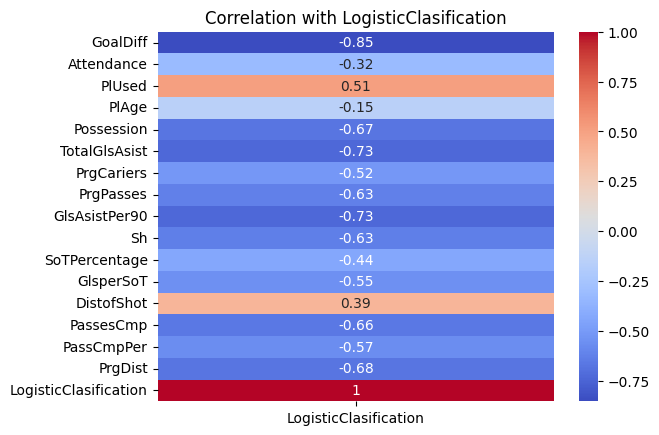

In [16]:
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix[['LogisticClasification']], annot=True, cmap='coolwarm')
plt.title('Correlation with LogisticClasification')
plt.show()




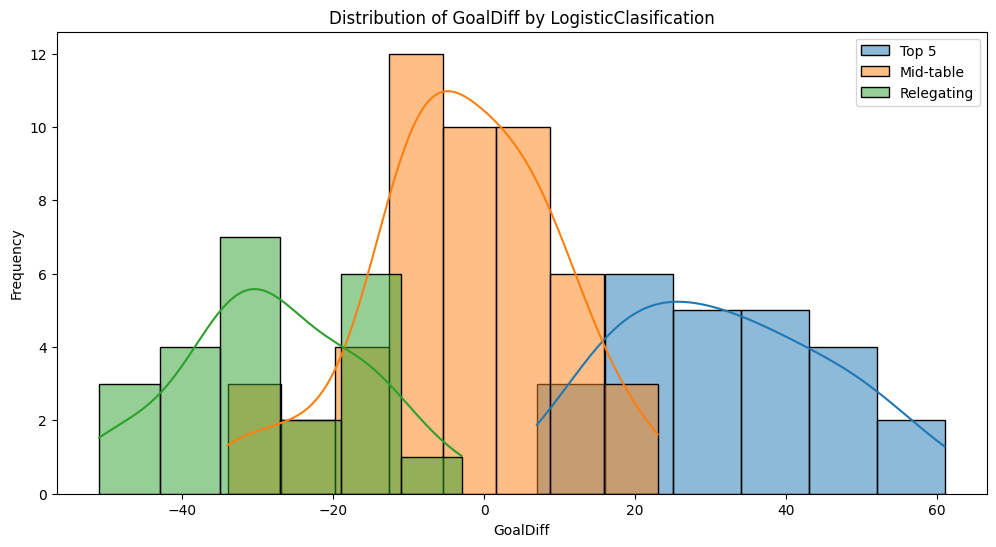

In [17]:
import seaborn as sns

def class_specific_analysis(feature_name):
    plt.figure(figsize=(12, 6))

    # Plotting Class 0
    sns.histplot(df[df['LogisticClasification'] == 0][feature_name], label='Top 5', kde=True)

    # Plotting Class 1
    sns.histplot(df[df['LogisticClasification'] == 1][feature_name], label='Mid-table', kde=True)

    # Plotting Class 2
    sns.histplot(df[df['LogisticClasification'] == 2][feature_name], label='Relegating', kde=True)

    plt.title(f'Distribution of {feature_name} by LogisticClasification')
    plt.xlabel(feature_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Example: Class-specific analysis for 'GoalDiff'
class_specific_analysis('GoalDiff')




**Future Predictions:**


In [18]:
# load mew dataset
from google.colab import files
uploaded = files.upload()
df_current_season = pd.read_csv("2023-2024BIGLeagueN.csv")
df_current_season.head(20)

Saving 2023-2024BIGLeagueN.csv to 2023-2024BIGLeagueN.csv


,Squad,Competition,Country,Rank,GamesPlayed,GoalDiff,PlUsed,PlAge,Possession,TotalGlsAsist,PrgCariers,PrgPasses,GlsAsistPer90,Sh,SoTPercentage,GlsperSoT,DistofShot,PassesCmp,PassCmpPer,PrgDist
0,Alavés,es La Liga,NaN,13,15,-5,23,"26,7","43,3",21,230,514,"1,4",192,"28,1","0,2","17,6",4139,"71,4",33300
1,Almería,es La Liga,NaN,20,15,-21,28,"25,8","48,7",26,240,458,"1,73",192,"35,9","0,22","18,3",5106,77,34812
2,Arsenal,eng Premier League,NaN,1,14,18,23,"25,2","60,6",45,289,757,"3,21",202,"32,2","0,34","16,3",7277,85,38245
3,Aston Villa,eng Premier League,NaN,4,14,13,24,"27,2","53,2",52,289,568,"3,71",202,"36,6","0,36","16,1",6080,"83,7",36202
4,Atalanta,it Serie A,NaN,8,13,8,25,"27,1","52,6",41,266,596,"3,15",177,"34,5","0,34","15,7",5748,"80,8",34558
5,Athletic Club,es La Liga,NaN,5,15,12,24,28,"50,9",50,285,632,"3,33",199,"37,7","0,35","15,5",5626,"77,2",39506
6,Atlético Madrid,es La Liga,NaN,4,14,17,22,"29,7","51,7",50,274,601,"3,57",182,"40,7","0,38","15,5",6550,"82,8",37098
7,Augsburg,de Bundesliga,NaN,9,13,-2,23,"26,3",42,36,149,358,"2,77",154,"31,2","0,4","17,3",3859,"72,8",29728
8,Barcelona,es La Liga,NaN,3,15,14,25,"26,7","65,5",43,426,761,"2,87",226,"37,6","0,28","16,8",8677,"87,4",44404
9,Bayern Munich,de Bundesliga,NaN,2,12,34,23,"27,9","62,7",77,355,686,"6,42",236,"40,3","0,41",16,7185,"87,2",39470


In [19]:
df_current_season = df_current_season.drop(['Country'], axis=1)


In [20]:
# dataframe information and first 5 rows
df_current_season.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Squad          96 non-null     object
 1   Competition    96 non-null     object
 2   Rank           96 non-null     int64 
 3   GamesPlayed    96 non-null     int64 
 4   GoalDiff       96 non-null     int64 
 5   PlUsed         96 non-null     int64 
 6   PlAge          96 non-null     object
 7   Possession     96 non-null     object
 8   TotalGlsAsist  96 non-null     int64 
 9   PrgCariers     96 non-null     int64 
 10  PrgPasses      96 non-null     int64 
 11  GlsAsistPer90  96 non-null     object
 12  Sh             96 non-null     int64 
 13  SoTPercentage  96 non-null     object
 14  GlsperSoT      96 non-null     object
 15  DistofShot     96 non-null     object
 16  PassesCmp      96 non-null     int64 
 17  PassCmpPer     96 non-null     object
 18  PrgDist        96 non-null     i

In [21]:
import pandas as pd

# Assuming df_current_season is your DataFrame
df_current_season['PlAge'] = pd.to_numeric(df_current_season['PlAge'].str.replace(',', '.'), errors='coerce')
df_current_season['Possession'] = pd.to_numeric(df_current_season['Possession'].str.replace(',', '.'), errors='coerce')
df_current_season['GlsAsistPer90'] = pd.to_numeric(df_current_season['GlsAsistPer90'].str.replace(',', '.'), errors='coerce')
df_current_season['SoTPercentage'] = pd.to_numeric(df_current_season['SoTPercentage'].str.replace(',', '.'), errors='coerce')
df_current_season['GlsperSoT'] = pd.to_numeric(df_current_season['GlsperSoT'].str.replace(',', '.'), errors='coerce')
df_current_season['DistofShot'] = pd.to_numeric(df_current_season['DistofShot'].str.replace(',', '.'), errors='coerce')
df_current_season['PassCmpPer'] = pd.to_numeric(df_current_season['PassCmpPer'].str.replace(',', '.'), errors='coerce')




In [22]:
df_current_season.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Squad          96 non-null     object 
 1   Competition    96 non-null     object 
 2   Rank           96 non-null     int64  
 3   GamesPlayed    96 non-null     int64  
 4   GoalDiff       96 non-null     int64  
 5   PlUsed         96 non-null     int64  
 6   PlAge          96 non-null     float64
 7   Possession     96 non-null     float64
 8   TotalGlsAsist  96 non-null     int64  
 9   PrgCariers     96 non-null     int64  
 10  PrgPasses      96 non-null     int64  
 11  GlsAsistPer90  96 non-null     float64
 12  Sh             96 non-null     int64  
 13  SoTPercentage  96 non-null     float64
 14  GlsperSoT      96 non-null     float64
 15  DistofShot     96 non-null     float64
 16  PassesCmp      96 non-null     int64  
 17  PassCmpPer     96 non-null     float64
 18  PrgDist     

In [23]:
df_current_season[['TotalGlsAsist', 'PrgCariers', 'PrgPasses', 'Sh', 'PassesCmp', 'PrgDist']] = df_current_season[['TotalGlsAsist', 'PrgCariers', 'PrgPasses', 'Sh', 'PassesCmp', 'PrgDist']].div(df_current_season['GamesPlayed'], axis=0)


In [24]:
df_current_season.head(20)

,Squad,Competition,Rank,GamesPlayed,GoalDiff,PlUsed,PlAge,Possession,TotalGlsAsist,PrgCariers,PrgPasses,GlsAsistPer90,Sh,SoTPercentage,GlsperSoT,DistofShot,PassesCmp,PassCmpPer,PrgDist
0,Alavés,es La Liga,13,15,-5,23,26.7,43.3,1.400000,15.333333,34.266667,1.40,12.800000,28.1,0.20,17.6,275.933333,71.4,2220.000000
1,Almería,es La Liga,20,15,-21,28,25.8,48.7,1.733333,16.000000,30.533333,1.73,12.800000,35.9,0.22,18.3,340.400000,77.0,2320.800000
2,Arsenal,eng Premier League,1,14,18,23,25.2,60.6,3.214286,20.642857,54.071429,3.21,14.428571,32.2,0.34,16.3,519.785714,85.0,2731.785714
3,Aston Villa,eng Premier League,4,14,13,24,27.2,53.2,3.714286,20.642857,40.571429,3.71,14.428571,36.6,0.36,16.1,434.285714,83.7,2585.857143
4,Atalanta,it Serie A,8,13,8,25,27.1,52.6,3.153846,20.461538,45.846154,3.15,13.615385,34.5,0.34,15.7,442.153846,80.8,2658.307692
5,Athletic Club,es La Liga,5,15,12,24,28.0,50.9,3.333333,19.000000,42.133333,3.33,13.266667,37.7,0.35,15.5,375.066667,77.2,2633.733333
6,Atlético Madrid,es La Liga,4,14,17,22,29.7,51.7,3.571429,19.571429,42.928571,3.57,13.000000,40.7,0.38,15.5,467.857143,82.8,2649.857143
7,Augsburg,de Bundesliga,9,13,-2,23,26.3,42.0,2.769231,11.461538,27.538462,2.77,11.846154,31.2,0.40,17.3,296.846154,72.8,2286.769231
8,Barcelona,es La Liga,3,15,14,25,26.7,65.5,2.866667,28.400000,50.733333,2.87,15.066667,37.6,0.28,16.8,578.466667,87.4,2960.266667
9,Bayern Munich,de Bundesliga,2,12,34,23,27.9,62.7,6.416667,29.583333,57.166667,6.42,19.666667,40.3,0.41,16.0,598.750000,87.2,3289.166667


In [25]:
# We identified relevant features
selected_features = ['GoalDiff', 'Sh', 'GlsAsistPer90', 'Possession', 'PrgPasses', 'PrgDist', 'PassesCmp', 'PlUsed', 'SoTPercentage']
X_last_season = df[selected_features]
X_current_season = df_current_season[selected_features]


In [26]:
# Merge datasets
merged_df = pd.concat([df, df_current_season], ignore_index=True)


In [65]:
# Define a function to map ranks to classifications
def classify_rank(rank):
    if rank <= 5:
        return 0  # Top 5
    elif rank <= 16:
        return 1  # Mid-table
    else:
        return 2  # Relegating

# Apply  function to create the 'Winner' column
merged_df['Winner'] = merged_df['Rank'].apply(classify_rank)

# Drop rows where 'Rank' is NaN (if any)
merged_df.dropna(subset=['Winner'], inplace=True)


In [66]:
# Assuming we want to predict the posision of each team for the end of the current season
# Split the data into training and testing sets
X = merged_df[selected_features]
y = merged_df['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Assuming 'PlAge', 'Possession', 'GlsAsistPer90', 'SoTPercentage', 'GlsperSoT', 'DistofShot', 'PassCmpPer'
columns_to_convert = ['Possession', 'GlsAsistPer90', 'SoTPercentage', 'GoalDiff', 'PrgPasses' ]

# Convert columns to float
X_train[columns_to_convert] = X_train[columns_to_convert].astype(float)

# Continue with model training
model.fit(X_train, y_train)





RandomForestClassifier(random_state=42)

In [68]:
# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.8205128205128205


In [69]:
# Use the trained model to predict the current season's data
current_season_predictions = model.predict(X_current_season)
print("Predictions for the current season:")
print(current_season_predictions)


Predictions for the current season:
[1 2 0 0 1 0 0 1 0 0 1 1 1 2 2 1 1 2 2 2 1 1 2 1 1 1 1 2 2 2 1 1 1 1 1 0 2
 1 2 1 0 0 1 1 1 1 1 1 0 0 0 1 2 2 1 2 1 0 1 1 2 0 0 1 1 1 0 1 0 1 1 0 1 0
 0 1 0 1 0 2 1 1 2 1 0 1 0 1 1 2 1 1 1 1 1 1]


In [70]:
import pandas as pd

# df_current_season contains the team names
team_names = df_current_season['Squad']
Competition = df_current_season ['Competition']
Rank = df_current_season ['Rank']

# Create a new DataFrame with team names and predictions
result_df = pd.DataFrame({'Squad': team_names, 'Competition': Competition , 'Prediction': current_season_predictions, 'Current Rank':Rank})

# Display the result DataFrame
result_df


,Squad,Competition,Prediction,Current Rank
0,Alavés,es La Liga,1,13
1,Almería,es La Liga,2,20
2,Arsenal,eng Premier League,0,1
3,Aston Villa,eng Premier League,0,4
4,Atalanta,it Serie A,1,8
...,...,...,...,...
91,Villarreal,es La Liga,1,12
92,Werder Bremen,de Bundesliga,1,13
93,West Ham,eng Premier League,1,9
94,Wolfsburg,de Bundesliga,1,11


In [76]:
# Sort the DataFrame by 'Prediction' column
result_df = result_df.sort_values(by='Prediction')

# Function to apply color based on prediction
def apply_color(val):
    if val == 0:
        return 'background-color: green'
    elif val == 1:
        return 'background-color: yellow'
    elif val == 2:
        return 'background-color: red'
    else:
        return ''

# Apply styling to the DataFrame
styled_result_df = result_df.style.applymap(apply_color, subset=['Prediction'])

# Iterate over unique competitions and display tables
for competition in result_df['Competition'].unique():
    competition_df = result_df[result_df['Competition'] == competition]

    # Display the table with styling
    print(f"\nTable for {competition}:")
    display(competition_df.style.applymap(apply_color, subset=['Prediction']))



Table for de Bundesliga:


,Squad,Competition,Prediction,Current Rank
73,RB Leipzig,de Bundesliga,0,4
84,Stuttgart,de Bundesliga,0,3
48,Leverkusen,de Bundesliga,0,1
9,Bayern Munich,de Bundesliga,0,2
30,Freiburg,de Bundesliga,1,8
26,Eint Frankfurt,de Bundesliga,1,7
11,Bochum,de Bundesliga,1,12
24,Darmstadt 98,de Bundesliga,1,16
37,Heidenheim,de Bundesliga,1,14
42,Köln,de Bundesliga,1,15



Table for fr Ligue 1:


,Squad,Competition,Prediction,Current Rank
62,Monaco,fr Ligue 1,0,3
76,Reims,fr Ligue 1,0,5
71,Paris S-G,fr Ligue 1,0,1
68,Nice,fr Ligue 1,0,2
49,Lille,fr Ligue 1,0,4
15,Brest,fr Ligue 1,1,7
83,Strasbourg,fr Ligue 1,1,15
45,Le Havre,fr Ligue 1,1,10
65,Nantes,fr Ligue 1,1,8
47,Lens,fr Ligue 1,1,6



Table for es La Liga:


,Squad,Competition,Prediction,Current Rank
74,Real Madrid,es La Liga,0,1
5,Athletic Club,es La Liga,0,5
8,Barcelona,es La Liga,0,3
35,Girona,es La Liga,0,2
6,Atlético Madrid,es La Liga,0,4
10,Betis,es La Liga,1,7
20,Celta Vigo,es La Liga,1,18
43,Las Palmas,es La Liga,1,8
34,Getafe,es La Liga,1,9
56,Mallorca,es La Liga,1,16



Table for eng Premier League:


,Squad,Competition,Prediction,Current Rank
3,Aston Villa,eng Premier League,0,4
2,Arsenal,eng Premier League,0,1
86,Tottenham,eng Premier League,0,5
57,Manchester City,eng Premier League,0,3
50,Liverpool,eng Premier League,0,2
23,Crystal Palace,eng Premier League,1,12
21,Chelsea,eng Premier League,1,10
32,Fulham,eng Premier League,1,14
95,Wolves,eng Premier League,1,13
16,Brighton,eng Premier League,1,8



Table for it Serie A:


,Squad,Competition,Prediction,Current Rank
78,Roma,it Serie A,0,4
61,Milan,it Serie A,0,3
66,Napoli,it Serie A,0,5
40,Inter,it Serie A,0,1
41,Juventus,it Serie A,0,2
64,Monza,it Serie A,1,10
12,Bologna,it Serie A,1,7
44,Lazio,it Serie A,1,9
33,Genoa,it Serie A,1,14
31,Frosinone,it Serie A,1,11
